In [13]:
## Important Necessary Packages
# !pip install pandas matplotlib

import pandas as pd

# !pip install matplotlib

import matplotlib.pyplot as plt

# !pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jenna\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


Here I am preparing the data which includes importing the set, testing variables for correlation, and researching what may be indicators for heart disease. Based on some research, exercise induced angina, or chest pain when exercising, can be an indicator of heart disease alongside other factors that seem to have a higher risk of heart disease such as age and gender.

Per this link https://www.kaggle.com/datasets/mexwell/heart-disease-dataset, the meaning of each value is as follows:

Sex: 
0 = female 
1 = male

Chest Pain Type:
1 = Typical Angina
2 = Atypical Angina
3 = Non-Anginal Pain
4 = Asymptomatic

Fasting Blood Sugar (>120 mg/dl):
0 = False
1 = True

Resting Electrocardiogram Results:
0 = Normal
1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria

Exercised Induced Angina (column name exang):
0 = No
1 = Yes

The Slope of the Peak Exercise ST Segment (# oldpeak):
1 = Upsloping
2 = Flat
3 = Downsloping

Class (column name target):
0 = Normal
1 = Heart Disease

In [28]:
# preparing data 

df = pd.read_csv('C:/Users/jenna/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2/heart.csv')

df_unique = df.drop_duplicates()
df_unique.head()

diseased_nondiseased_counts = df_unique['target'].value_counts()
print(diseased_nondiseased_counts)

target
1    164
0    138
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

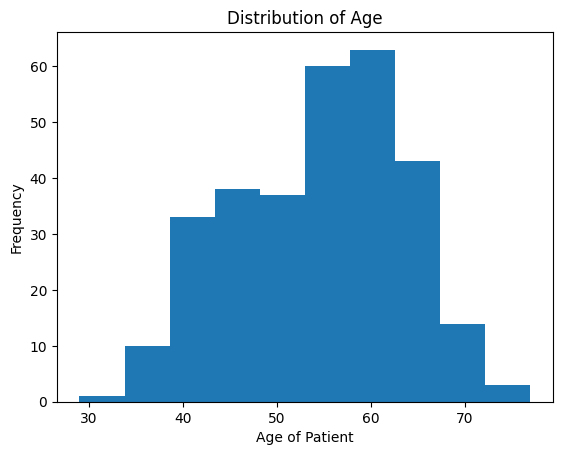

In [20]:
# visualizations 

#put age histogram here to show normal distribution with a right lean
plt.hist(df_unique['age'], bins=10) 
plt.title('Distribution of Age')
plt.xlabel('Age of Patient')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

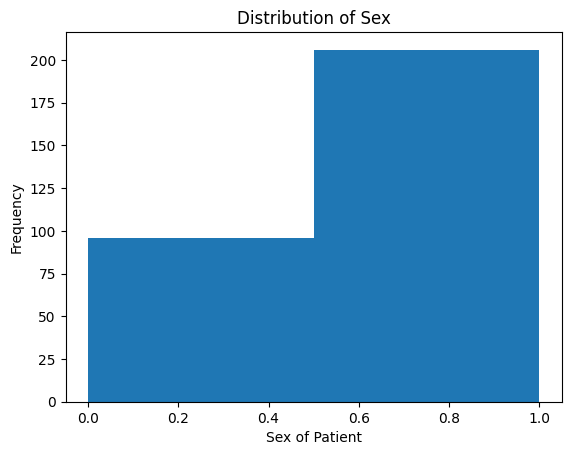

In [23]:
# sex histogram
plt.hist(df_unique['sex'], bins=2) 
plt.title('Distribution of Sex')
plt.xlabel('Sex of Patient')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency of Each Type')

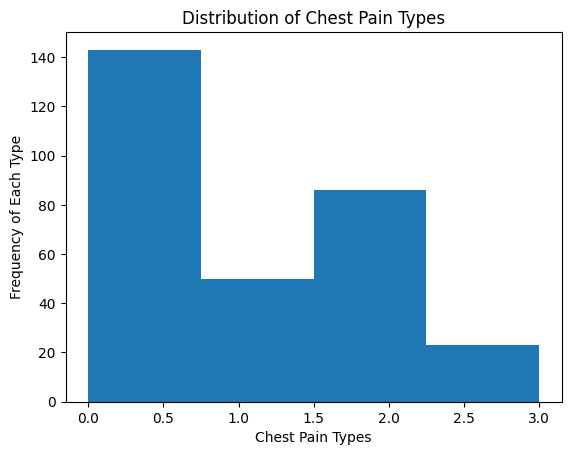

In [27]:
# chest pain type histogram
plt.hist(df_unique['cp'], bins=4) 
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Types')
plt.ylabel('Frequency of Each Type')

Key Takeaways from Visualization:
- There is a variety of ages in our sample, youngest being 30 and the oldest high 70s, however the majority of our sample is 50+
- A majority of patients experienced typical angina (exercising chest pain), the second most frequent was non-anginal pain
-Over half the sample has heart disease, but over half the sample does not have chest pain not related to exercise